In [1]:
import pandas
import plotnine
import numpy
import scipy
import math
from plotnine import *


#    Best Practices for Graphical Summaries of Data

Depending on how we create graphical depictions of data, we can alter the viewer's impression of the data; in other words, if a picture is worth a thousand words, then how we make the picture can change the story.  Ideally, we want our graphical summaries to be as objective as possible; we want the data to speak for themselves.  There are no hard and fast rules for creating graphical summaries. Still, there are some basic principles to follow^[There are more specific "rules" that might occur to you or you might read elsewhere, but in general, these principles are intended to encourage good practice in making clear, accurate, and objective representations of the data.].  

* Always have a title for your graphical summary. Titles should accurately describe the variables and the relationship shown in the summary.  If one of the axes is time or the data are for a specific period, that should be in the title. 
* Clearly label the axes and include units.
* When comparing two data sets, the axes for each summary should match. 

Other principles and rules of thumb apply to specific types of plots that we will address as we work through these workshop exercises. 

##   Lecture Examples  
Let's examine choices that we can make with the examples from Week 1. 
and load the epa_data dataset.

In [2]:
epa_data = pandas.read_csv("../DATA/epa_data.csv")

##   Creating the Pareto Plot
To create the Pareto plot^[Named for Vilfredo Pareto https://en.wikipedia.org/wiki/Vilfredo_Pareto].  

The simplest way to make a barplot is to just use <tt>geom_bar()</tt>:

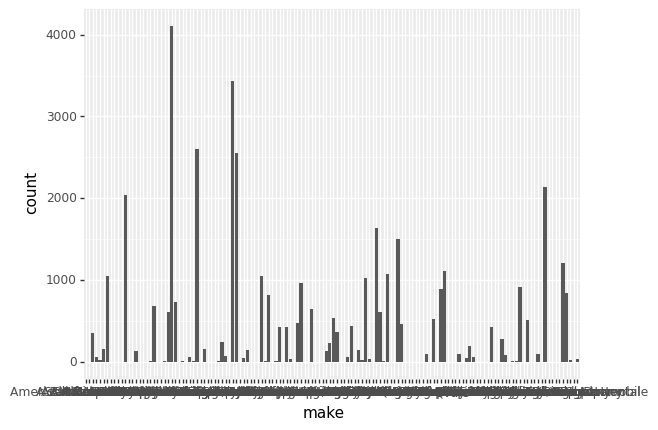

<ggplot: (8769085103318)>

In [3]:
(ggplot(epa_data,aes(x = 'make'))+
  geom_bar(stat = "count"))

But this is ugly, first of all there are:

In [4]:
epa_data["make"].nunique()

138

One hundred thirty-eight different makes represented in the data set; this makes the $x$-axis unreadable.

* What are some other problems with this chart?
* What if any information can you gather from this chart?
* What should you do to improve this chart and make it more informative?

Note that it probably makes more sense to look at only the major manufacturers.
The first step is to create a data structure we will call <tt>make_data</tt>^[Note that the command shown uses "pipes". The <tt>%>%</tt> symbol tells <tt>R</tt> to take the output of one command and input it into the next command, starting with the first command on the left and moving to the right.] which will contain the top ten most common makes of cars in <tt>epa_data</tt>.

In [6]:

manufacturer_list = epa_data['make'].value_counts().index.tolist()

manufacturer_cat = pandas.Categorical(epa_data['make'], categories=manufacturer_list)

manufacturer_count = epa_data['make'].value_counts().nlargest(5)

# assign to a new column in the DataFrame

df = epa_data.assign(manufacturer_cat = manufacturer_cat)
df['count'] = df.groupby('make')['make'].transform('count')
df = df[df.make.isin(manufacturer_count.index)]

make_par = (ggplot(df)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
)


Now let's see what the bar plot looks like

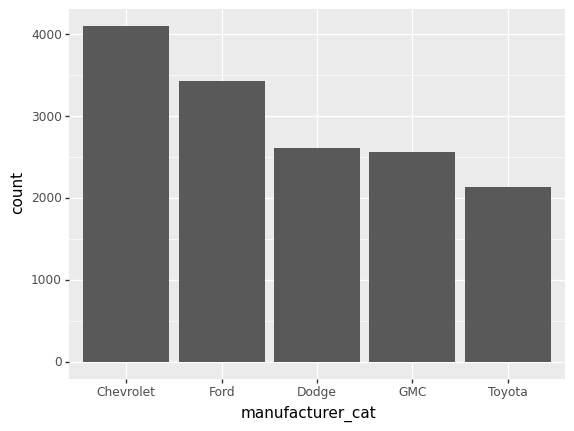

<ggplot: (8769086000369)>

In [7]:
make_par

Now, modify the code below, adding appropriate labels for the axes, and a title to the plot\

**Hint:** The commands <code>xlab()</code>, <code>ylab()</code>, and <code>ggtitle()</code> can be used to label the axes and add a title. And the command <code>theme()</code> can be used to adjust the text size.
 
<p style="font-size:5px">&thinsp;</p>

In [8]:
manufacturer_list = epa_data['make'].value_counts().index.tolist()

manufacturer_cat = pandas.Categorical(epa_data['make'], categories=manufacturer_list)

manufacturer_count = epa_data['make'].value_counts().nlargest(5)

# assign to a new column in the DataFrame

df = epa_data.assign(manufacturer_cat = manufacturer_cat)
df['count'] = df.groupby('make')['make'].transform('count')
df = df[df.make.isin(manufacturer_count.index)]

make_par = (ggplot(df)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
)


In [ ]:
manufacturer_list = epa_data['make'].value_counts().index.tolist()

manufacturer_cat = pandas.Categorical(epa_data['make'], categories=manufacturer_list)

manufacturer_count = epa_data['make'].value_counts().nlargest(5)

# assign to a new column in the DataFrame

df = epa_data.assign(manufacturer_cat = manufacturer_cat)
df['count'] = df.groupby('make')['make'].transform('count')
df = df[df.make.isin(manufacturer_count.index)]

make_par = (ggplot(df)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make') + 
ggtitle("Number of Models by Make for the Top 5 Manufacturers")
)

##   Creating the Line Plot
To create a line plot showing how EPA ratings for fuel economy while driving on the highway have changed we could simply use <tt>ggplot()</tt> to create a generic plot for <tt>epa_data</tt> with <tt>year</tt> for the $x$-axis and <tt>city</tt> for the $y$-axis. Then add a line with <tt>geom_line()</tt>.

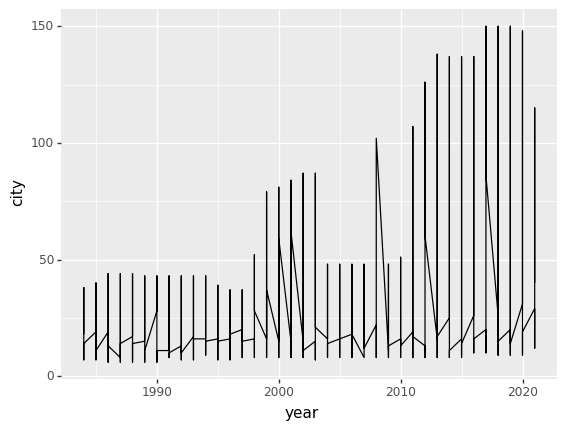

<ggplot: (8769085407353)>

In [9]:
(ggplot(epa_data,aes(x = "year", y = "city"))+
  geom_line()
  )

But these results are confusing and difficult to understand,

* What are some other problems with this chart?
* What if any information can you gather from this chart?
* What should you do to improve this chart and make it more informative?

Modify the code below to plot the average and median values of <tt>city</tt> for each year and add appropriate title, and labels for the axes^[Try plotting the maximum value of <tt>city</tt> for each year.  What changes?].\
<br>

**Hint:** You might use<code>
  stat_summary()
  </code>to create the line of yearly averages and use commands <code>xlab()</code>, <code>ylab()</code>, and <code>ggtitle()</code> to label the axes and add a title. And the command <code>theme()</code> can be used to adjust the text size.

<p style="font-size:5px">&thinsp;</p>

In [ ]:
##  Create a new data frame of the yearly means using groupby() adnd create a 
##  Line plot of the yearly averages and a second plot of the yearly median values
##  of the city fuel economy

yearly_city = 


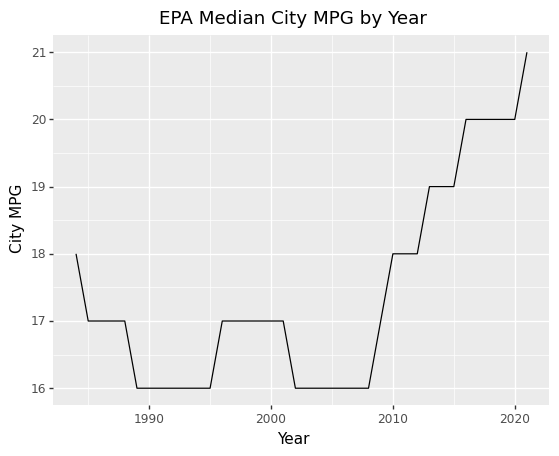

<ggplot: (8769087267356)>

In [12]:

df = epa_data.groupby(['year'])['city'].mean().reset_index()
df_2 = epa_data.groupby(['year'])['city'].median().reset_index()
df["median"] = df_2["city"]
df = df.rename(columns = {"city": "average"})

mean_mpg_year = (ggplot(df,aes(x = 'year', y = 'average'))+
  geom_line()+
  xlab("Year")+
  ylab("City MPG")+
  ggtitle("EPA Average City MPG by Year")
  )
  
med_mpg_year = (ggplot(df,aes(x = 'year', y = 'median'))+
  geom_line()+
  xlab("Year")+
  ylab("City MPG")+
  ggtitle("EPA Median City MPG by Year")
  )
  
mean_mpg_year
med_mpg_year


##   Histograms

The line plot shows the trends over time in the average EPA City fuel economy ratings. Still, if we want to look more closely at a specific year to see the distribution or density of EPA City fuel economy ratings, we need to use a histogram.

In [13]:
mpg_1990 = (ggplot(epa_data[epa_data['year'].isin([1990])],aes('city'))+
  geom_histogram(aes(y=after_stat('density')), binwidth = 2)+
  xlab("City MPG")+
  ylab("Relative Frequency")+
  ggtitle("EPA City MPG for 1990")
  )

Let's compare the histogram of <tt>city</tt> to <tt>hwy</tt>.  To do this, we will need to "melt" our table, so we have one variable that indicates whether the mileage is "city" or "highway".

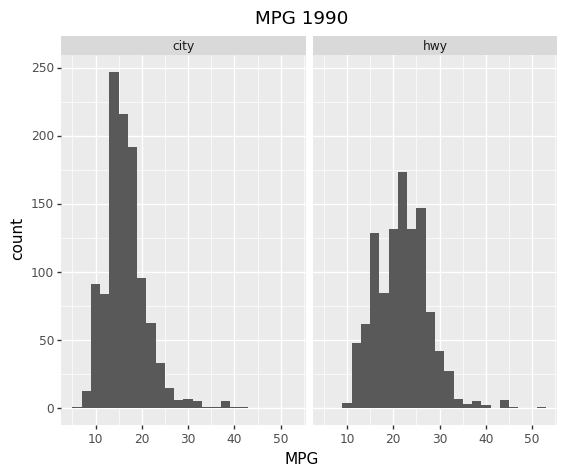

<ggplot: (8769085811176)>

In [14]:

##  Create a new table with just the stuff we need.

df = epa_data[epa_data.year.isin([1990])]
df = df[["city","hwy"]].reset_index()
df = pandas.melt(df,id_vars = ["index"],value_vars= ["city","hwy"], var_name = "type", value_name = "mpg")


(
  ggplot(df,aes('mpg'))+
  geom_histogram(aes(y = after_stat('count')),binwidth = 2)+
  facet_wrap('type',scales="fixed")+
  xlab("MPG")+
  ggtitle("MPG 1990")
  )



Is this a fair comparison? What principles of good graphical summaries does this violate?

* Identify what needs to be done to ensure that this plot conforms with the best principles for graphical summaries and make the changes.

* Adjust the bin width for the two charts and see how this changes your interpretation of the data.
<br>

**Hint:** Modify your code to plot the density rather than counts, this makes it more easy to compare city versus highway mileage.
 
<p style="font-size:5px">&thinsp;</p>

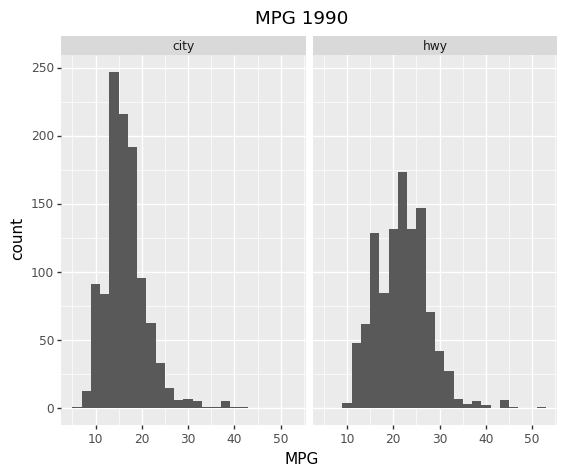

<ggplot: (8769086120614)>

In [15]:


(
  ggplot(df,aes('mpg'))+
  geom_histogram(aes(y = after_stat('count')),binwidth = 2)+
  facet_wrap('type',scales="fixed")+
  xlab("MPG")+
  ggtitle("MPG 1990")
  )

##    Concluding Remarks

Graphical summaries may seem trivial and simplistic, but as you can see, it is easy to produce confusing or misleading graphical summaries; by adhering to the principles of good graphical summaries, you can avoid many problems.

## Worksheet Practical Questions


### Question 1

If you wanted to compare the city fuel economy for manual versus automatic transmissions, what would you need to do, and which graphical summary would you use? Use ggplot to produce this graphical summary.\
<br>

**Hint:** Like the example with city versus highway we would need to create a new data frame.
 
<p style="font-size:5px">&thinsp;</p>

In [ ]:
# Answer here!

df = epa_data[epa_data.year.isin([1990])]


In [ ]:

df = epa_data[epa_data.year.isin([1990])]

(
  ggplot(df,aes('city'))+
  geom_histogram(aes(y = after_stat('density')),binwidth = 2)+
  facet_wrap('trans',scales="fixed")+
  xlab("MPG")+
  ggtitle("MPG 1990")
  )

### Question 2

If you wanted to explore the how engine displacement changed over time, what type of graph or chart would you use and why? Use ggplot to produce this graphical summary.\

**Hint:** As in the example, we need to use <tt>groupby()</tt> to create the plot.
 
<p style="font-size:5px">&thinsp;</p>

In [ ]:
# Answer here!


In [ ]:
yearly_disp = epa_data.groupby(['year'])['disp'].mean().reset_index()
yearly_disp["average"] = yearly_city["disp"]

mean_disp_year = (ggplot(yearly_disp,aes(x = 'year', y = 'disp'))+
  geom_line()+
  xlab("Year")+
  ylab("Displacement")+
  ggtitle("Engine Displacement by Year")
  )
  
  yearly_city = epa_data.groupby(['year'])['city'].mean().reset_index()
mean_mpg_year = (ggplot(yearly_city,aes(x = 'year', y = 'city'))+
  geom_line()+
  xlab("Year")+
  ylab("City MPG")+
  ggtitle("EPA City MPG by Year")
  )

ggplot(epa_data,aes(x = year, y = disp))+
stat_summary(fun = "mean", geom="line")+
xlab("Year")+
ylab("Average Engine Displacement (l)")+
ggtitle("Yearly Average Engine Displacement (l)")+
theme(plot.title=element_text(hjust=0.5))

### Question 3

Is the Pareto plot in the example useful? What information does it give you? How could it be modified to identify which manufacturers made the most fuel-efficient cars? Use `city` to measure fuel economy.

**Hint:** As in the previous example we will meed to do some data manipulation using `pandas`
 
<p style="font-size:5px">&thinsp;</p>

In [ ]:
# Answer here!


/var/folders/js/h5cgrmx10sq3mnnb7tkv11n80000gn/T/ipykernel_53206/1857343014.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


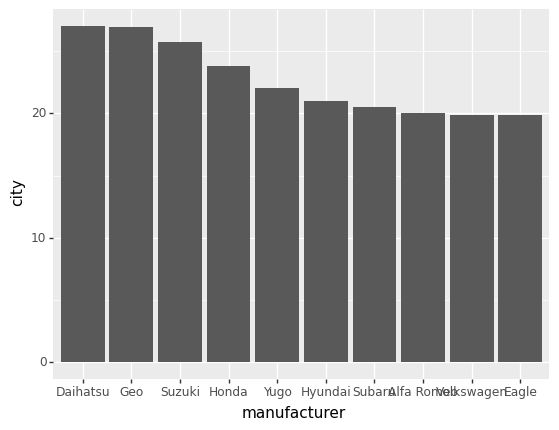

<ggplot: (8769085405959)>

In [16]:

df = epa_data[epa_data["year"]==1990]

df = df[{"make","city"}].groupby("make").mean().nlargest(10,"city")

manufacturer = df.index.tolist()

df  = df.reset_index()

manufacturer = pandas.Categorical(df["make"], categories = manufacturer)

df.assign(manufacturer=manufacturer)

(ggplot(df,aes(x="manufacturer", y = "city"))+
  geom_bar(stat = "identity")
)

